# Cas d'application : VEGA
Sujet proposé par Marc Budinger.


## Introduction
Le lanceur VEGA (Vettore Europeo di Generazione Avanzata) est un lanceur de type léger développé en Italie par l'agence spatiale européene (ESA).
<img src="img/vega.jpg">
<a href="https://directory.eoportal.org/web/eoportal/satellite-missions/v-w-x-y-z/vega">source de l'image</a>


Nous nous concentreront ici sur le système lié à la poussée vectorielle. Ce système consiste à diriger l'appareil au travers de la modification de l'angle de poussée. Ci dessous un schéma explicatif

<img src="img/vect.png">
<a href="https://fr.wikipedia.org/wiki/Pouss%C3%A9e_vectorielle#/media/File:Fr_Gimbaled_thrust_diagram.svg">source de l'image</a>


** Note : La construction du modèle ne sera pas détaillée car elle peut être trouvée dans le dépôt suivant : https://github.com/marcbudinger/R3ASC_2018 **

## Modélisation du problème d'optimisation
### Construction des modèles de substitution


In [1]:
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    sns.set_style('dark')
except:
    pass
    
# Reading the CSV FILE
import pandas as pd
FILENAME = "csv/gamme_moteur.csv"
dataset = pd.read_csv(FILENAME, sep=';') # setting the separator as ";"
dataset = dataset.set_index('Ref')
# Print the header (first lines) of the dataset
dataset.head()

,Tnom,Tmax,D_mm,L_mm,Mass,Wmax_rpm,Inertie
Ref,,,,,,,
NX205EAS,0.45,2.0,56.5,100.0,0.77,8900,0.000021
NX210EAP,1.00,3.4,56.5,120.0,1.30,7000,0.000038
NX310EAK,2.00,6.6,71.0,147.0,2.10,8400,0.000079
NX420EAJ,4.00,13.4,91.5,175.0,3.80,7200,0.000290
NX430EAF,5.50,18.8,91.5,200.0,4.80,6200,0.000426


In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
DEGREE = 2
# On prend le couple nominal comme vecteur d'entrée
x = dataset.iloc[:,0].values.reshape(-1,1)
XNAME = "T_nom"
models = dict()
polys = dict()




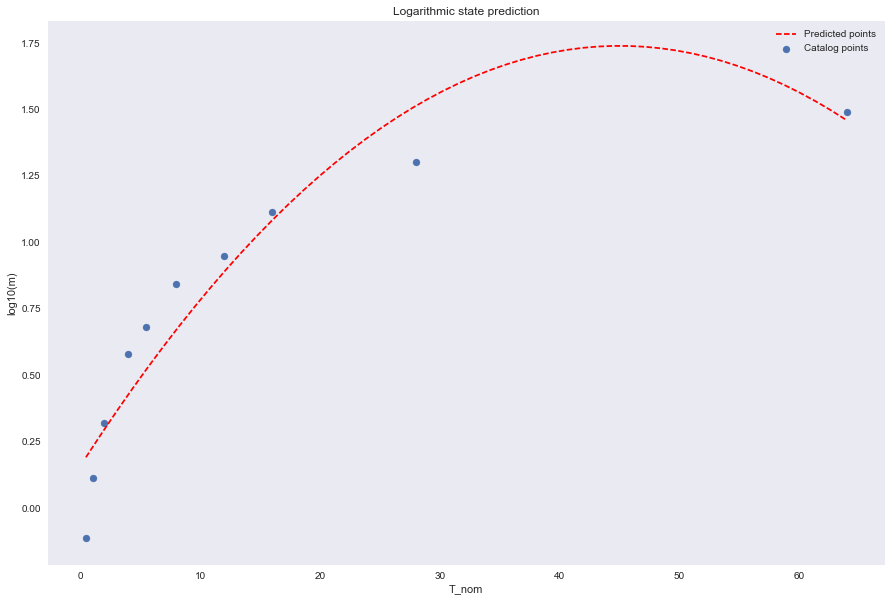

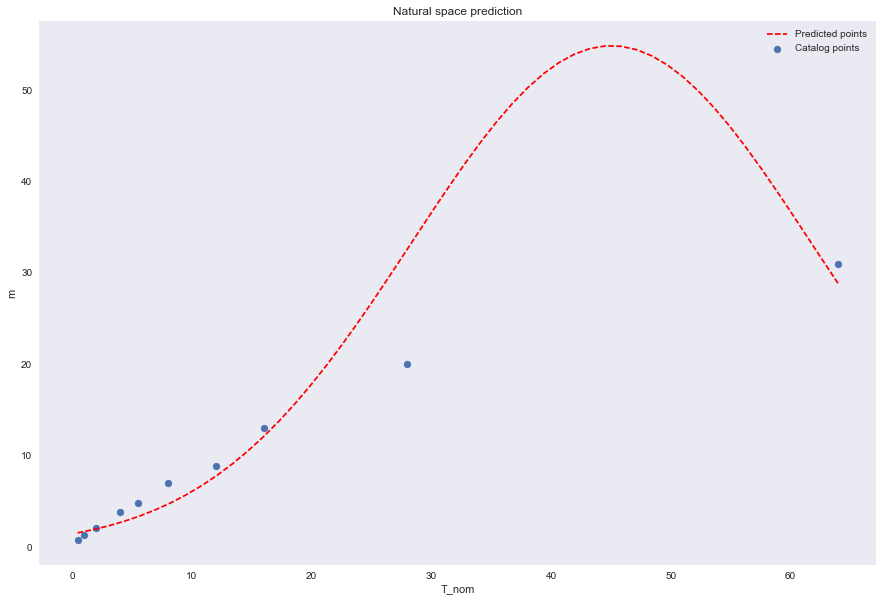

In [3]:
# ============ F(T_arr) -> m ========================
DEGREE = 2
FIGSIZE = (15,10)

# On récupère y
m = dataset.iloc[:,4].values
poly_m =  PolynomialFeatures(degree=DEGREE, include_bias=False)
x_poly_m = poly_m.fit_transform(x)

# Creation du modèle
# Passage à l'espace logaritmique
m_log = np.log10(m)
# Creation du modèle polynomial
model_m = LinearRegression()
model_m.fit(x_poly_m,m_log)


# On sauvegarde le modele
models['m'] = model_m
polys['m'] = poly_m

# Plot
x_grid = np.linspace(x.min(),x.max(),50).reshape(-1,1)
y_pred = models['m'].predict(polys['m'].transform(x_grid))

plt.figure(figsize=FIGSIZE)
plt.scatter(x,m_log,label="Catalog points")
plt.plot(x_grid,y_pred,'r--',label="Predicted points")
plt.ylabel("log10(m)")
plt.xlabel(XNAME)
plt.legend()
plt.title("Logarithmic state prediction")


# Plot in natural space
x_grid = np.linspace(x.min(),x.max(),50).reshape(-1,1)
y_pred = 10**(models['m'].predict(polys['m'].transform(x_grid)))

plt.figure(figsize=FIGSIZE)
plt.scatter(x,m,label="Catalog points")
plt.plot(x_grid,y_pred,'r--',label="Predicted points")
plt.ylabel("m")
plt.xlabel(XNAME)
plt.legend()
plt.title("Natural space prediction")
plt.show()

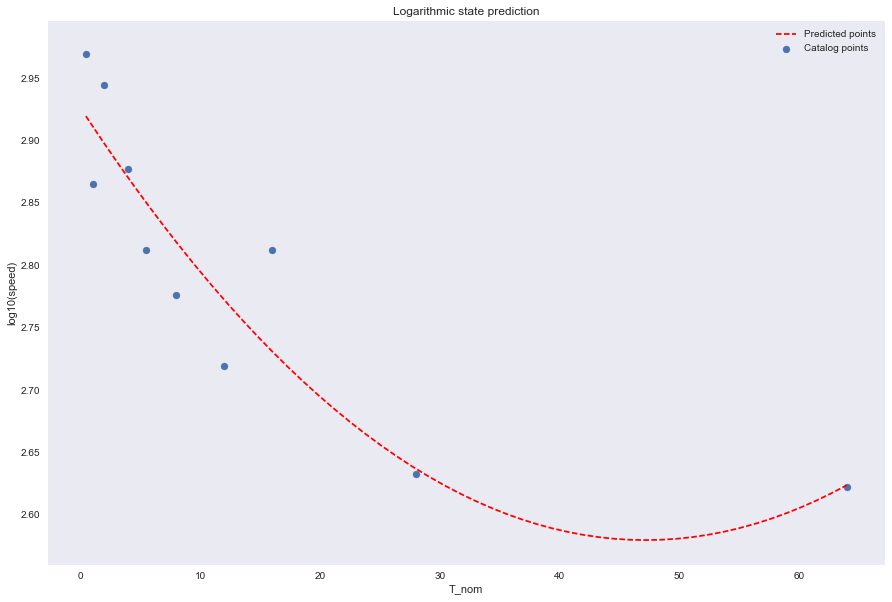

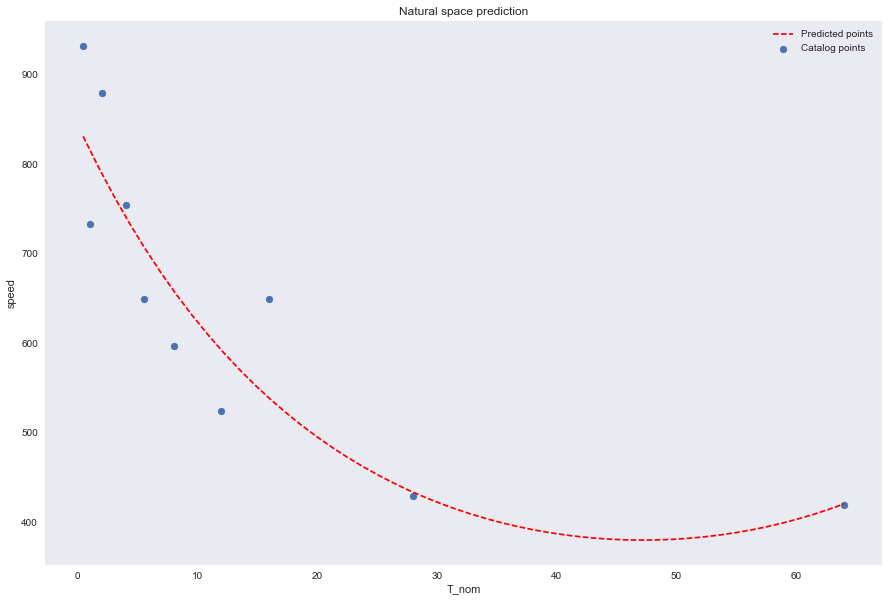

In [4]:
# ============ F(T_arr) -> speed ========================
DEGREE = 2

# On récupère y
speed = (dataset.iloc[:,5].values)*(2*np.pi/60)
poly_speed =  PolynomialFeatures(degree=DEGREE, include_bias=False)
x_poly_speed = poly_speed.fit_transform(x)

# Creation du modèle
# Passage à l'espace logaritmique
speed_log = np.log10(speed)
# Creation du modèle polynomial
model_speed = LinearRegression()
model_speed.fit(x_poly_speed,speed_log)


# On sauvegarde le modele
models['speed'] = model_speed
polys['speed'] = poly_speed

# Plot
x_grid = np.linspace(x.min(),x.max(),50).reshape(-1,1)
y_pred = models['speed'].predict(polys['speed'].transform(x_grid))

plt.figure(figsize=FIGSIZE)
plt.scatter(x,speed_log,label="Catalog points")
plt.plot(x_grid,y_pred,'r--',label="Predicted points")
plt.ylabel("log10(speed)")
plt.xlabel(XNAME)
plt.legend()
plt.title("Logarithmic state prediction")


# Plot in natural space
x_grid = np.linspace(x.min(),x.max(),50).reshape(-1,1)
y_pred = 10**(models['speed'].predict(polys['speed'].transform(x_grid)))

plt.figure(figsize=FIGSIZE)
plt.scatter(x,speed,label="Catalog points")
plt.plot(x_grid,y_pred,'r--',label="Predicted points")
plt.ylabel("speed")
plt.xlabel(XNAME)
plt.legend()
plt.title("Natural space prediction")
plt.show()



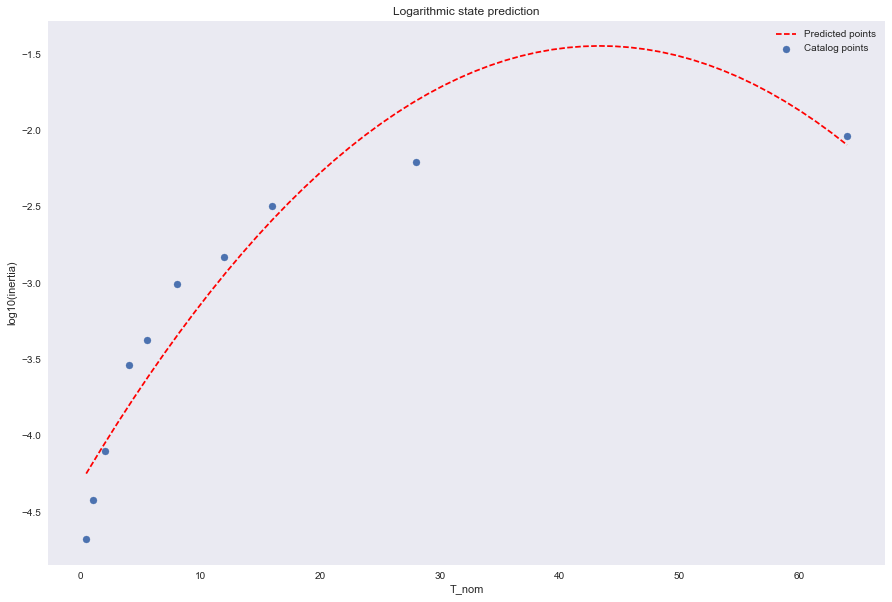

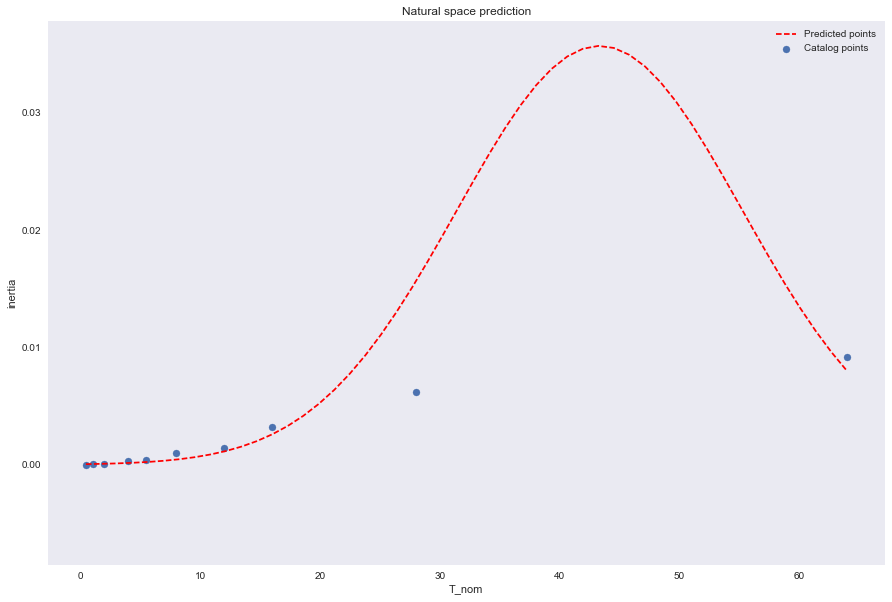

Nous pouvons clairement voir uqe le modèle overfits l'ensemble des données de départ.
Une solution serait de séparer les données d'entrée en sous ensemble de test et sous ensemble d'entrainement.
Ceci ne sera pas effectué ici car cela n'est pas l'objectif.


In [5]:
# ============ F(T_arr) -> inertia ========================
DEGREE = 2

# On récupère y
inertia = (dataset.iloc[:,6].values)
poly_inertia =  PolynomialFeatures(degree=DEGREE, include_bias=False)
x_poly_inertia = poly_inertia.fit_transform(x)

# Creation du modèle
# Passage à l'espace logaritmique
inertia_log = np.log10(inertia)
# Creation du modèle polynomial
model_inertia = LinearRegression()
model_inertia.fit(x_poly_inertia,inertia_log)


# On sauvegarde le modele
models['inertia'] = model_inertia
polys['inertia'] = poly_inertia

# Plot
x_grid = np.linspace(x.min(),x.max(),50).reshape(-1,1)
y_pred = models['inertia'].predict(polys['inertia'].transform(x_grid))

plt.figure(figsize=FIGSIZE)
plt.scatter(x,inertia_log,label="Catalog points")
plt.plot(x_grid,y_pred,'r--',label="Predicted points")
plt.ylabel("log10(inertia)")
plt.xlabel(XNAME)
plt.legend()
plt.title("Logarithmic state prediction")


# Plot in natural space
x_grid = np.linspace(x.min(),x.max(),50).reshape(-1,1)
y_pred = 10**(models['inertia'].predict(polys['inertia'].transform(x_grid)))

plt.figure(figsize=FIGSIZE)
plt.scatter(x,inertia,label="Catalog points")
plt.plot(x_grid,y_pred,'r--',label="Predicted points")
plt.ylabel("inertia")
plt.xlabel(XNAME)
plt.legend()
plt.title("Natural space prediction")
plt.show()

print("Nous pouvons clairement voir uqe le modèle overfits l'ensemble des données de départ.")
print("Une solution serait de séparer les données d'entrée en sous ensemble de test et sous ensemble d'entrainement.")
print("Ceci ne sera pas effectué ici car cela n'est pas l'objectif.")




### Test du modèle
Afin de tester la prédiction du modèle nous utiliserons le des résultats issus d'éléments finis et les compareront aux résultats obtenus par ce modèle de substitution.
Une droite correspond à un modèle précis.

### Création du modèle d'optimisation

In [6]:
from numpy import pi
# On crée une classe pour l'initialisation des variables
# Note : Les classes sont paramétrées et architecturées pour fonctionner avec le script proposé par Marc Budinger
# Elles ne visent pas à être efficace ni optimisées.
class InitializationVariables(object):
    def __init__(self):
        self.static_force=40e3   # [N]
        self.inertial_load=800.  # [kg]
        self.displacement_magnitude=10e-3 # [m]
        self.frequency=2   # [Hz]
        # Speed and load acceleration
        self.max_speed=2*pi*self.frequency*self.displacement_magnitude     # [m/s]
        self.max_acceleration=2*pi*self.frequency*self.max_speed   # [m/s²]
        self.max_load=self.static_force+self.max_acceleration*self.inertial_load    # [N]
        # Imposed values
        self.pitch=10e-3/2/pi  # [m/rad]
        # Optimisation variables
        #Variables d'optimisation
        self.n_reduc=2
        self.k_oversizing=1
        
        self.last_results = dict()
        
        self.parameters = np.array([self.n_reduc, self.k_oversizing]).reshape(-1,1) # Column vector
        
        # The constraints are the same so they can be defined here.
        return
    
    def get_dataframe(self,x):
        key = ( float(x[0]), float(x[1]) )
        
        values = self.last_results[key]
        df = pd.DataFrame(data={"Parameter":tuple(values.keys()),"Value":tuple(values.values())})
        df = df.set_index("Parameter")
        return df
    

In [7]:
import modeles
import scipy
# On crée une classe pour un type particulier d'optimisation

DEBUG = False

class CombinedObject(InitializationVariables):
    def __init__(self):
        super().__init__()
        self.sizing_code(self.parameters)
        
        self.constraints = (
                {'type':'ineq','fun':self.constraint_1},
                {'type':'ineq','fun':self.constraint_2},
                {'type':'ineq','fun':self.constraint_3},
                {'type':'ineq','fun':self.constraint_4},
                )
        return
    
    def constraint_1(self,x:np.ndarray):
        n_reduc = float(x[0])
        const = self.speed-n_reduc*self.max_speed/self.pitch
        return const
    def constraint_2(self,x:np.ndarray):
        const = self.t_em_est-self.t_em_max
        return const
    
    def constraint_3(self,x:np.ndarray):
        """
        k_oversizing >1
        equals to
        k_oversizing -1.0 > 0.0
        """
        const = float(x[1]) -1.0
        return const
    
    def constraint_4(self,x:np.ndarray):
        """mass > 0"""
        const = self.mass
        return const
    
    def sizing_code(self,params):
        # Ensuring the proper format of the variable
        # Extracting variables
        n_reduc = params[0]
        k_oversizing = params[1]
        
        # extracting variables from "self" for easier reading
        max_load = self.max_load
        pitch = self.pitch
        max_acceleration = self.max_acceleration
        
        # Torque motor estimation
        t_em_est= k_oversizing*max_load*pitch/n_reduc
        # =======================================
        # Computation part
        # =======================================
        # Estimation part:
        # ===================
    
        # Building the prediction models
        t_arr = np.array([t_em_est]).reshape(-1,1)
        mass = 10.0**(
            models['m'].predict(
                polys['m'].transform(t_arr)
            )[0]
        )
        speed =10.0**(
            models['speed'].predict(
                polys['speed'].transform(t_arr)
            )[0]
        )# *60/(2*np.pi)#should it be in rad/sec ?
        inertia = 10.0**(
            float(models['inertia'].predict(
                polys['inertia'].transform(t_arr)
            )[0])
        )
    
        # Saving parameters
        self.mass = mass
        self.speed = speed
        self.inertia = inertia
        self.n_reduc = n_reduc
        self.k_oversizing = k_oversizing
        self.t_em_est = t_em_est
        
        # ===================
        #  # Exact torque calculation with motor inertia
        t_em_max= max_load*pitch/n_reduc+inertia*max_acceleration*n_reduc/pitch
        if DEBUG:
            print('\n\nComputing t_em_max ')
            print('t_em_max',t_em_max)
            print('max_load',max_load)
            print('pitch',pitch)
            print('n_reduc',n_reduc)
            print('inertia',inertia)
            print('max acce',max_acceleration)
        
        self.t_em_max = t_em_max
        
        # Saving the current state values in the dict we prepared (that might be used for the projection)
        key = (float(params[0]),float(params[1]))
        self.last_results[key] = {'mass':float(mass),'speed':float(speed),'inertia':float(inertia),'t_em_max':float(t_em_max)}
        return mass

    
    def sizing_code_cobyla_wrapper(self,params:np.ndarray, options:str):
        """Receiving the parameters and computing the output.
        
        Args:
            params (np.ndarray): Vector composed as the following : 
                                 [  
                                    [n_reduc],
                                    [k_oversizing] 
                                    ]
            options (str): Option of the function.
        """
        mass = self.sizing_code(params)
        # Objectifs et contraintes
        if options=='Obj':
            return mass
        else:
            #dfp = pd.DataFrame(data = {"Data":["v-nred*vmax/pitch","tem_est-tem_max","k_oversizing-1.0"],"Value":[float(speed-n_reduc*max_speed/pitch), float(t_em_est-t_em_max), float(k_oversizing-1.0)]})
            #dfp = dfp.set_index("Data")
            #print("\n\n")
            #print(dfp)
            return [float(self.speed-self.n_reduc*self.max_speed/self.pitch),
                    float(self.t_em_est-self.t_em_max),
                    float(self.k_oversizing-1.0)]


### Lancement de la procédure d'optimisation

In [8]:
import sys
sys.stdout.flush()

# TWEAKING PARAMETERS
METHOD  = "SLSQP"
SOLVER_OPTIONS = {'maxiter':5000, 'disp':False}
TOL = 1e-3

print("Building the optimisation problem, please wait...")

v_comb = CombinedObject()

print("Variables internes initiales")
print(v_comb.get_dataframe(v_comb.parameters))

result_optim = scipy.optimize.minimize(v_comb.sizing_code,
                                                v_comb.parameters,
                                                method = METHOD,
                                                constraints = v_comb.constraints,
                                                tol=TOL,
                                                options=SOLVER_OPTIONS)


print("{meth} Les résultats sont : ".format(meth=METHOD))
print("\n\tSucces : ",result_optim.success)
print("\Message de sortie : ",result_optim.message)
print("\tn_reduc : {res}".format(res=result_optim.x[0]))
print("\tk_surdim : {res}".format(res=result_optim.x[1]))
print("\nVariables associées :")
print(v_comb.get_dataframe(result_optim.x))

print("\n\nOn prend ensuite le point le plus proche dans le catalogue qui répond aux contraintes.")


Building the optimisation problem, please wait...
Variables internes initiales
                Value
Parameter            
mass        42.003774
speed      408.978831
inertia      0.024226
t_em_max    80.911404
SLSQP Les résultats sont : 

	Succes :  True
\Message de sortie :  Optimization terminated successfully.
	n_reduc : 8.378864696467692
	k_surdim : 0.9999996543600853

Variables associées :
                Value
Parameter            
mass         4.590806
speed      661.568639
inertia      0.000430
t_em_max    11.408714


On prend ensuite le point le plus proche dans le catalogue qui répond aux contraintes.
